In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

**About The Dataset**

For our disease classification example, we have a dataset with 134 columns and 4920 rows. Each row corresponds to a unique case, and each column represents a different feature. The features are symptoms, and the target variable is the prognosis, indicating the predicted outcome or class for each case.

The 134 columns in our dataset represent different symptoms observed in patients. These symptoms could range from common indicators like fever and cough to more specific ones depending on the nature of the diseases under consideration. The features play a crucial role in the classification process as they are the input variables used by the algorithm to make predictions.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [ ]:
df_train = pd.read_csv('/content/Training.csv')
df_test = pd.read_csv('/content/Testing.csv')

# Train Dataset

In [ ]:
# Open the train dataset
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df_test.head(4)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, itching to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


In [ ]:
# Checking if the Unnamed:133 is an empty column
df_train['Unnamed: 133'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4920 entries, 0 to 4919
Series name: Unnamed: 133
Non-Null Count  Dtype  
--------------  -----  
0 non-null      float64
dtypes: float64(1)
memory usage: 38.6 KB


The above result shows that Unnamed: 133 is total empty

In [ ]:
df_train = df_train.drop('Unnamed: 133',axis=1)

In [ ]:
df_train

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [ ]:
df_train.shape

(4920, 133)

In [ ]:
df_train.isnull().any()

itching                 False
skin_rash               False
nodal_skin_eruptions    False
continuous_sneezing     False
shivering               False
                        ...  
inflammatory_nails      False
blister                 False
red_sore_around_nose    False
yellow_crust_ooze       False
prognosis               False
Length: 133, dtype: bool

In [ ]:
df_train.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [ ]:
df_train.info

<bound method DataFrame.info of       itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0                 0   
1             0       0           0             0        0                 0   
2             0       0           0             0        0                 0   
3             0       0           0             0        0                 0   
4             0       0           0             0        0                 0   
...         ...     ...         ...           ...      ...               ...   
4915          0       0           0             0        0                 0   
4916          0       0           0             0        0                 0   
4917          0       0           0             0        0                 0   
4918          0       0           1             0        0                 0   
4919          0       0           0             0        0                 0   

      ...  blackheads  scurring  skin_peeling  silver_like_dusting  \
0     ...           0         0             0                    0   
1     ...           0         0             0                    0   
2     ...           0         0             0                    0   
3     ...           0         0             0                    0   
4     ...           0         0             0                    0   
...   ...         ...       ...           ...                  ...   
4915  ...           0         0             0                    0   
4916  ...           1         1             0                    0   
4917  ...           0         0             0                    0   
4918  ...           0         0             1                    1   
4919  ...           0         0             0                    0   

      small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                        0                   0        0                     0   
1                        0                   0        0                     0   
2                        0                   0        0                     0   
3                        0                   0        0                     0   
4                        0                   0        0                     0   
...                    ...                 ...      ...                   ...   
4915                     0                   0        0                     0   
4916                     0                   0        0                     0   
4917                     0                   0        0                     0   
4918                     1                   1        0                     0   
4919                     0                   0        1                     1   

      yellow_crust_ooze                                prognosis  
0                     0                         Fungal infection  
1                     0                         Fungal infection  
2                     0                         Fungal infection  
3                     0                         Fungal infection  
4    

In [ ]:
prognosis = df_train['prognosis'].unique()
prognosis

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
df_train.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x=df_train.drop('prognosis',axis=1)
x

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [ ]:
y=df_train['prognosis']
y

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [ ]:
X=df_test.drop('prognosis',axis=1)   #test.csv file

In [ ]:
Y=df_test['prognosis']             #test.csvfile

In [ ]:
np.max(x,axis=1)

0       1
1       1
2       1
3       1
4       1
       ..
4915    1
4916    1
4917    1
4918    1
4919    1
Length: 4920, dtype: int64

In [ ]:
np.min(x,axis=1)

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Length: 4920, dtype: int64

In [ ]:
np.std(x,axis=0)

itching                 0.344695
skin_rash               0.366380
nodal_skin_eruptions    0.146524
continuous_sneezing     0.207572
shivering               0.146524
                          ...   
small_dents_in_nails    0.150446
inflammatory_nails      0.150446
blister                 0.150446
red_sore_around_nose    0.150446
yellow_crust_ooze       0.150446
Length: 132, dtype: float64

In [ ]:
np.std(x,axis=1)

0       0.171420
1       0.149033
2       0.149033
3       0.149033
4       0.149033
          ...   
4915    0.208299
4916    0.171420
4917    0.171420
4918    0.208299
4919    0.190903
Length: 4920, dtype: float64

In [ ]:
correlation_matrix = x.corr()
correlation_matrix

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
small_dents_in_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,1.000000,0.946120,-0.023720,-0.023720,-0.023720
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120


In [ ]:
prognosis_counts=df_train['prognosis'].value_counts()
prognosis_counts


Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

In [ ]:
len(prognosis)

41

# Test Dataset

In [ ]:
# Open the test dataset
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 43.8+ KB


In [ ]:
df_test.shape

(42, 133)

The analysis shows that the test dataset is very small just 42 row and 133 column compared to 4920 rows for the train dataset

In [ ]:
label = prognosis_counts.index
value_count = prognosis_counts.values

In [ ]:
import matplotlib.pyplot as plt

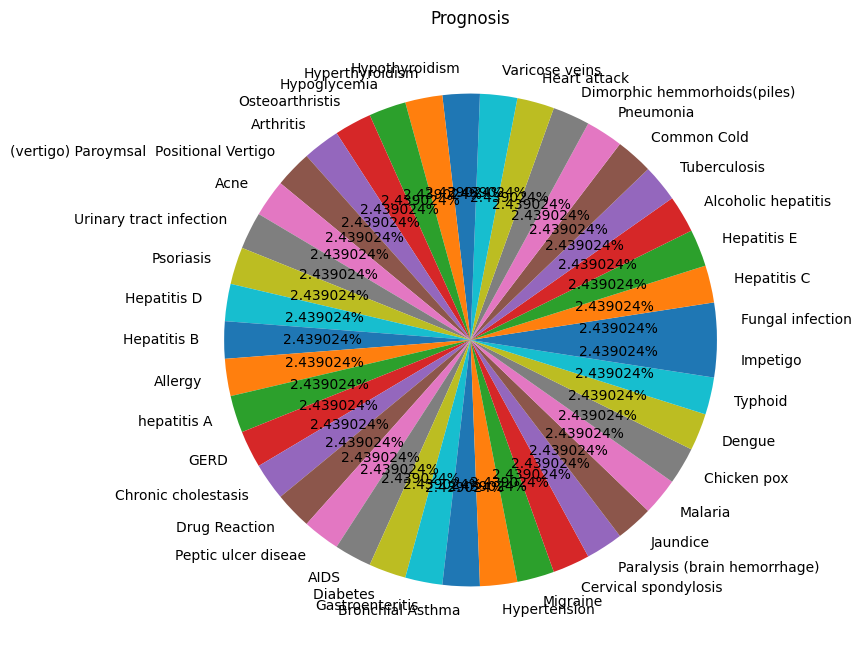

In [ ]:
fig=plt.figure(figsize=(10,8))
plt.pie(value_count,labels=label,autopct='%1f%%')
plt.title('Prognosis')
plt.show()

<Axes: >

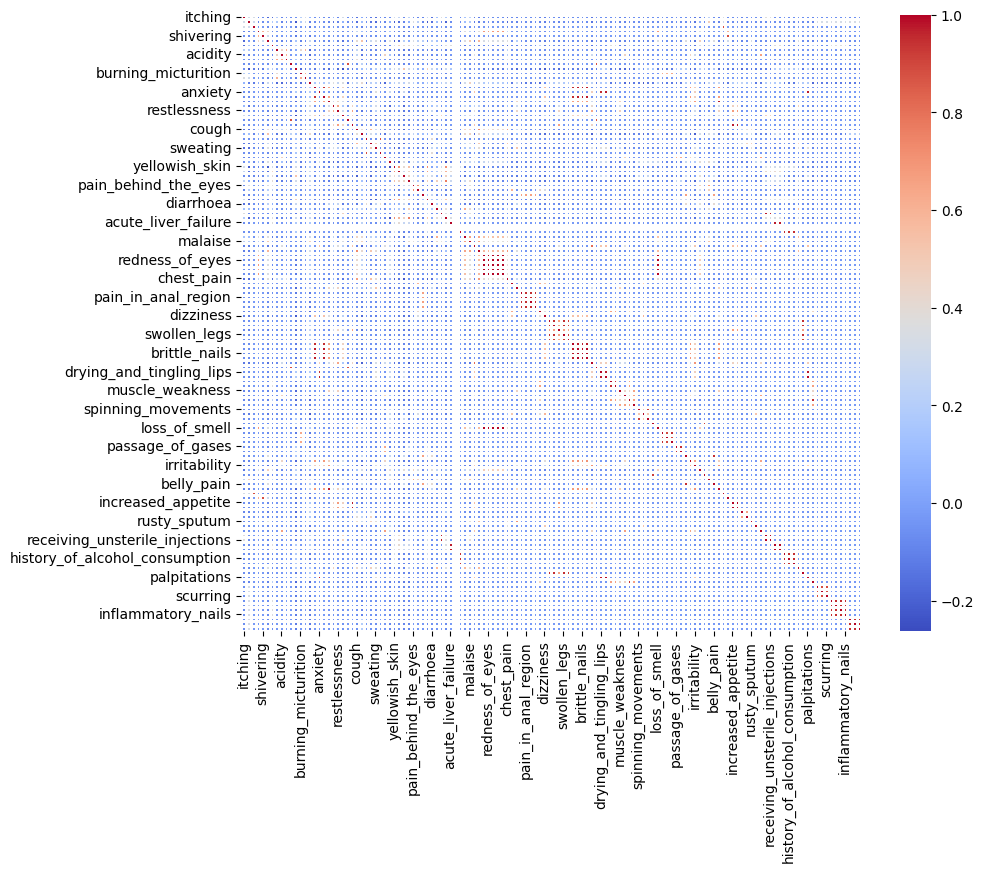

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),annot=False,linewidth=1 , cmap ='coolwarm')

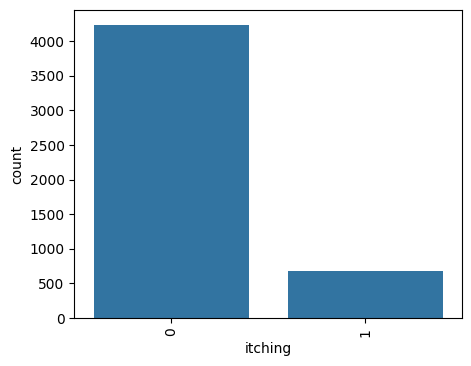

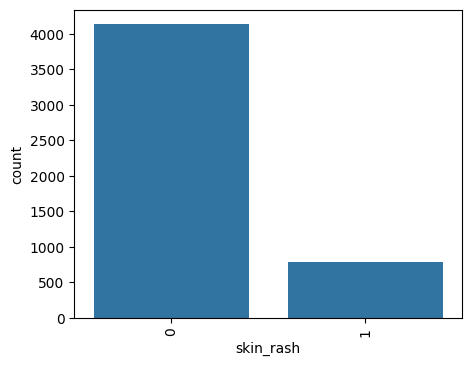

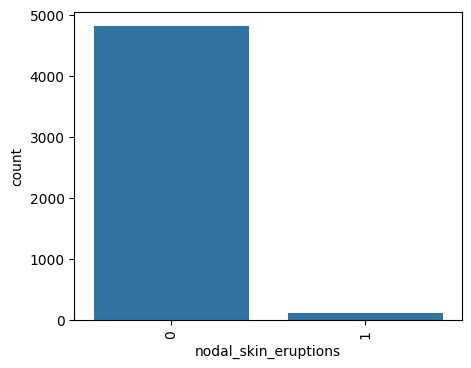

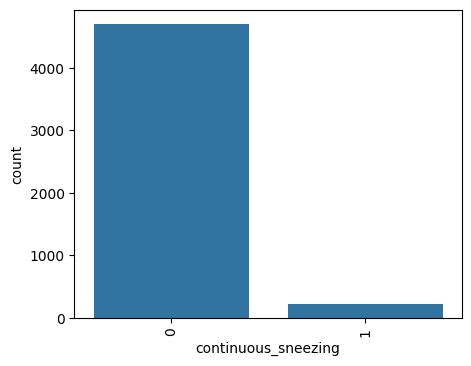

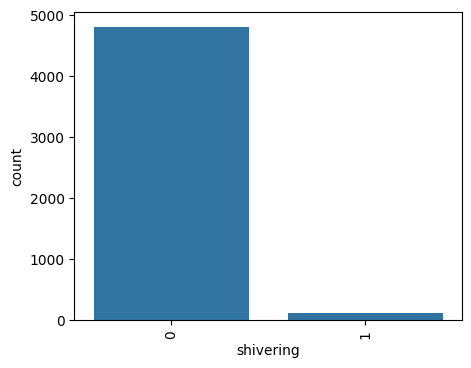

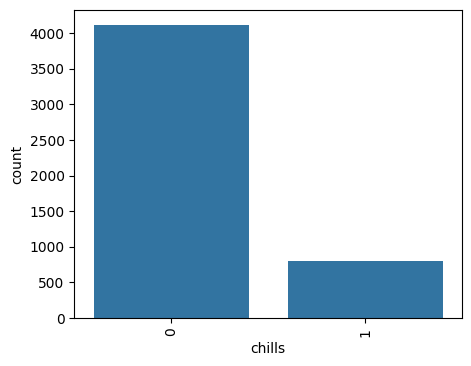

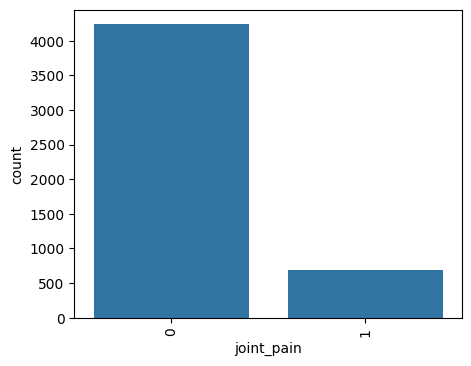

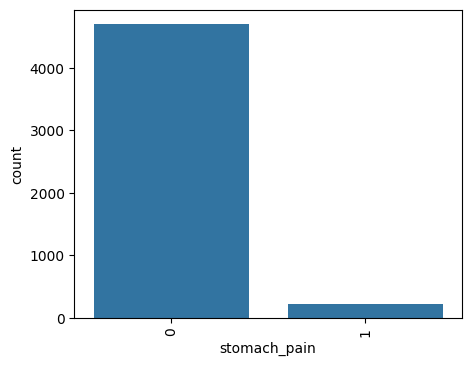

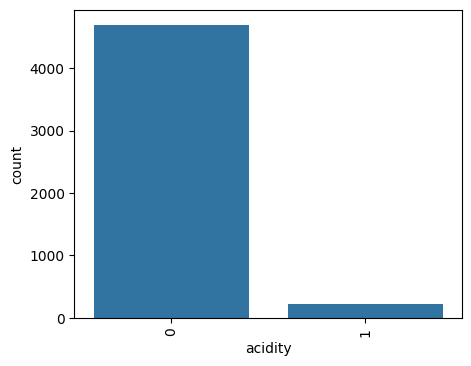

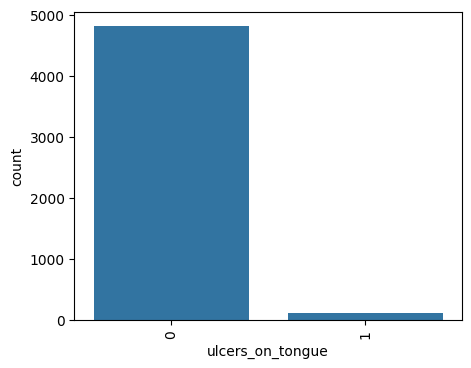

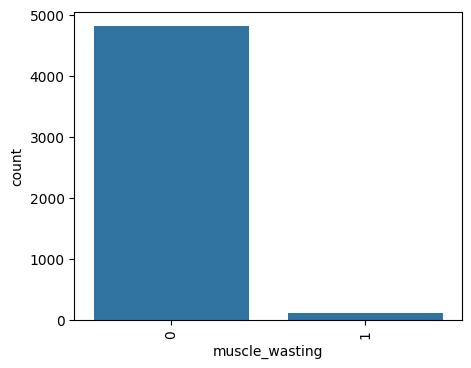

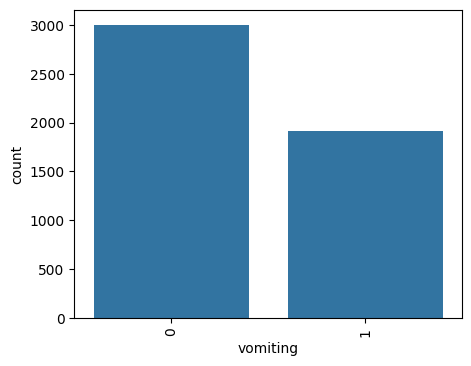

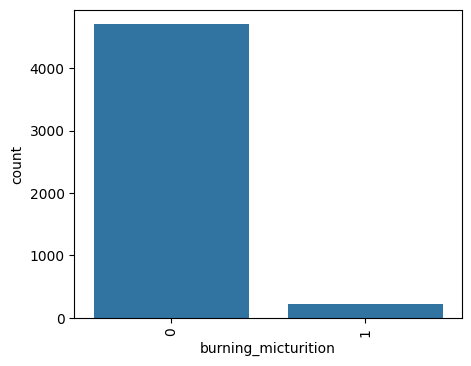

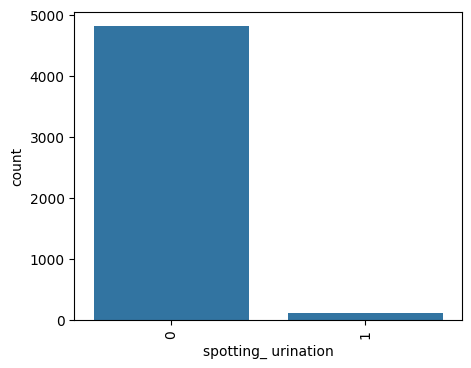

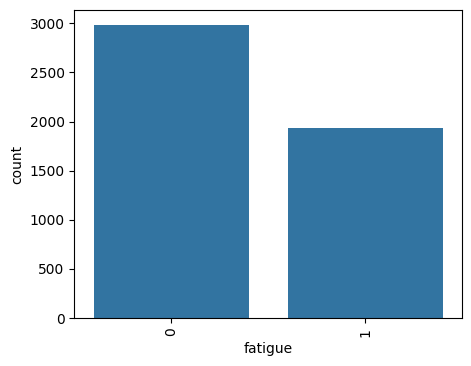

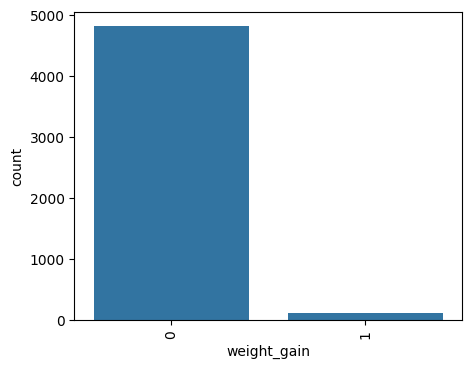

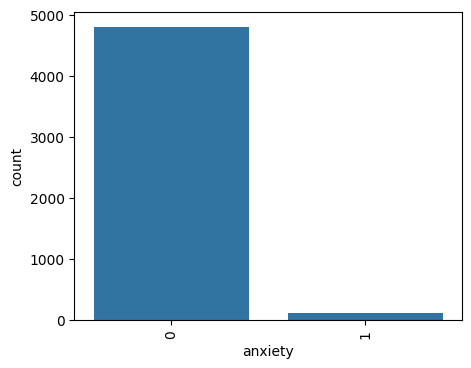

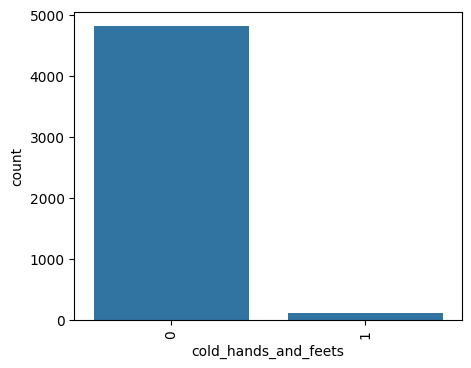

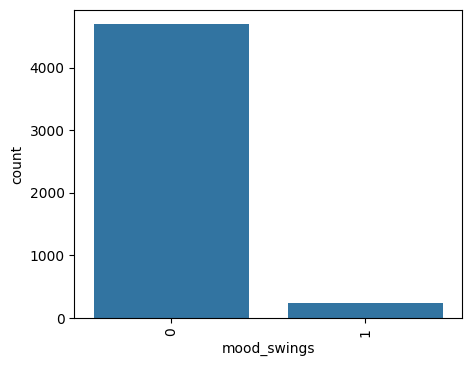

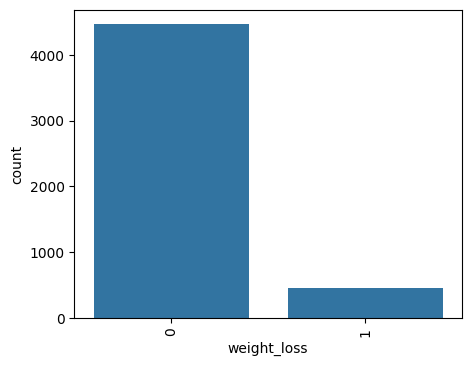

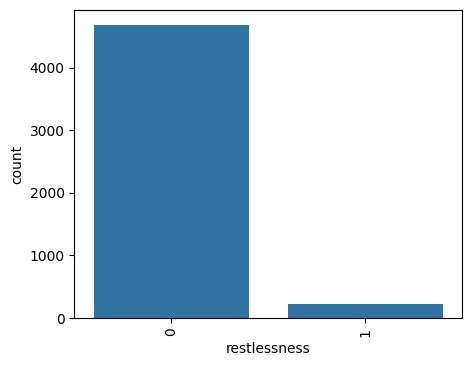

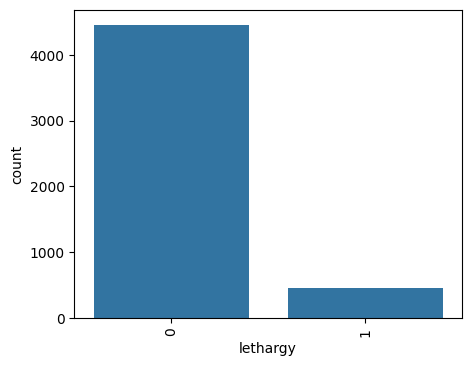

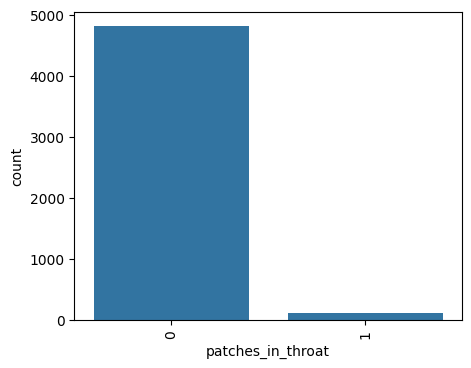

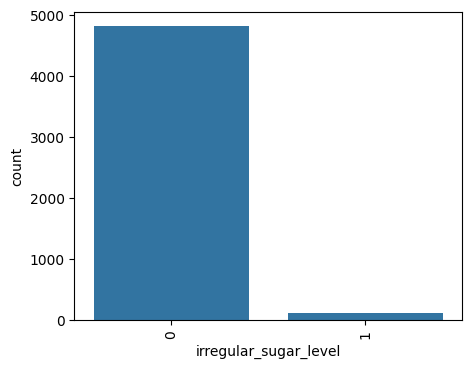

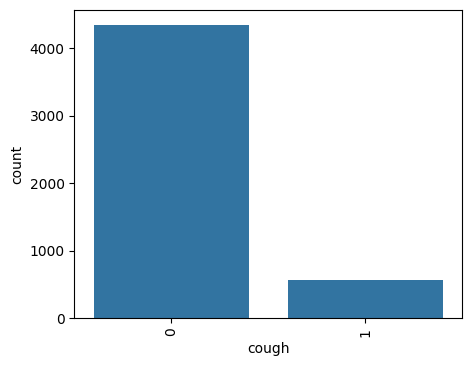

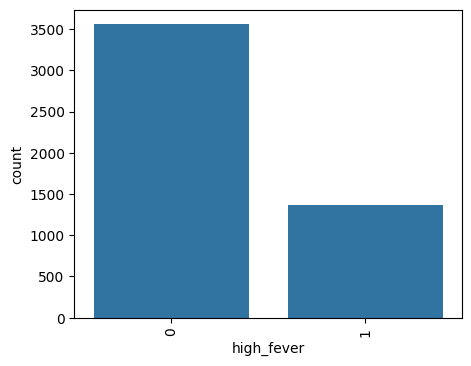

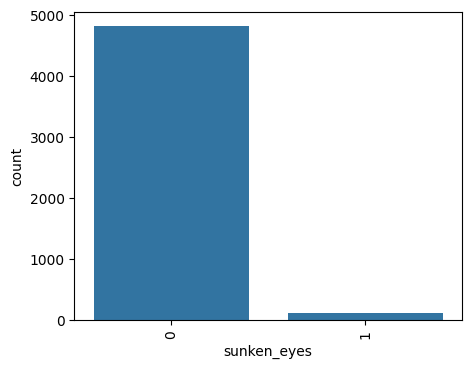

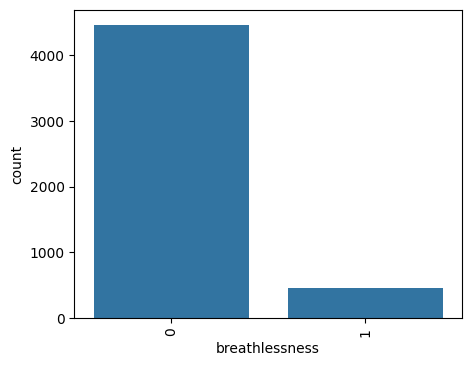

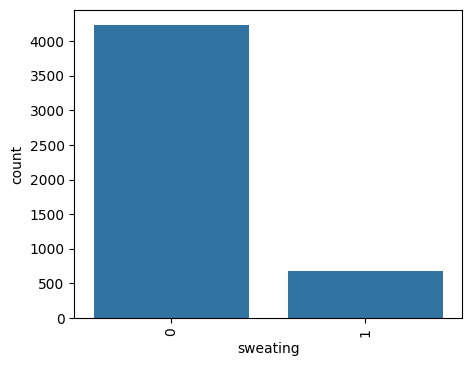

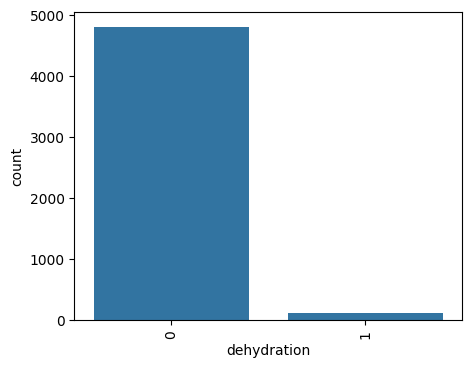

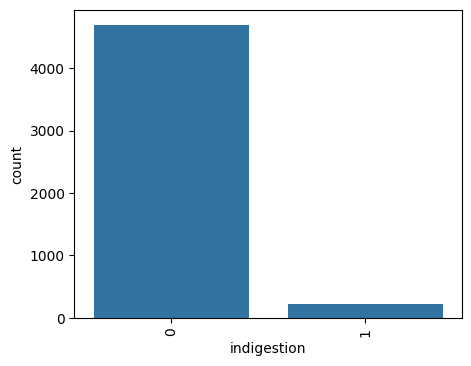

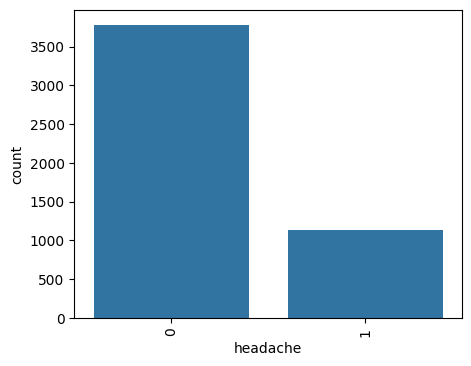

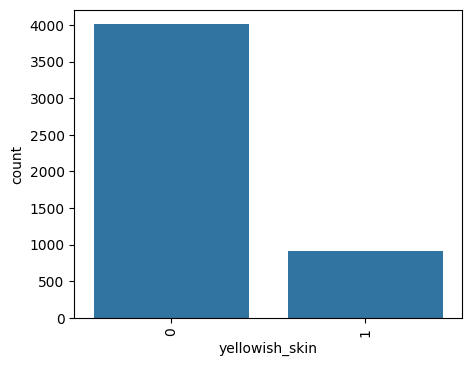

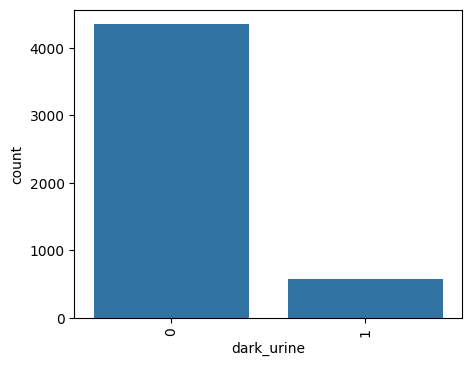

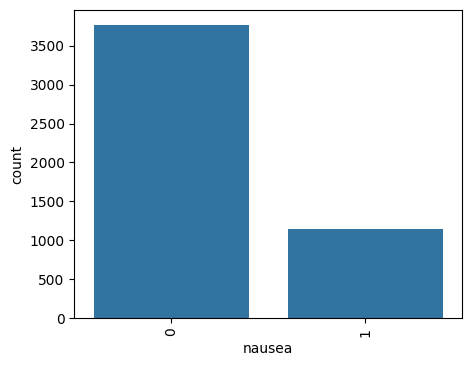

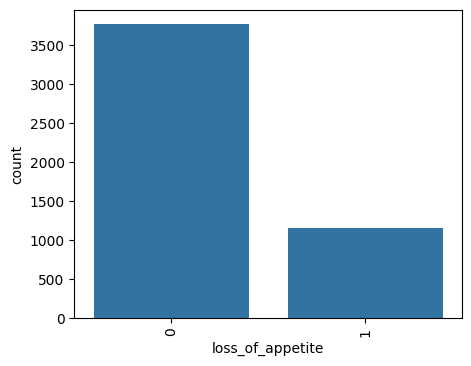

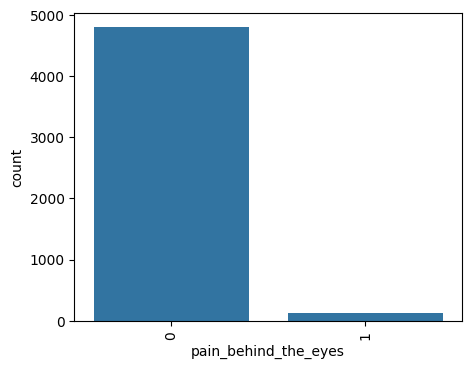

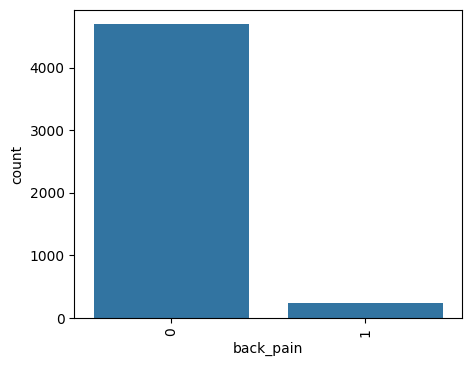

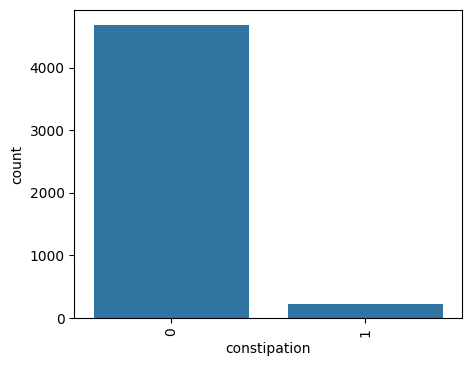

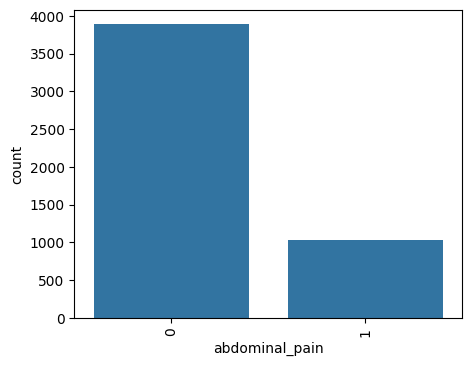

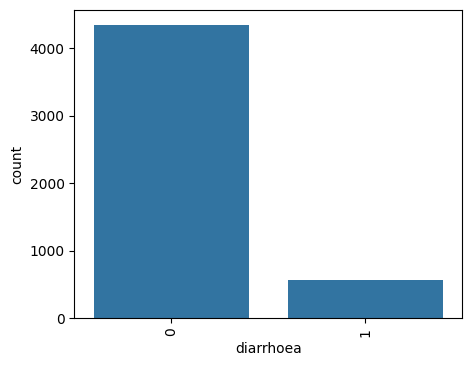

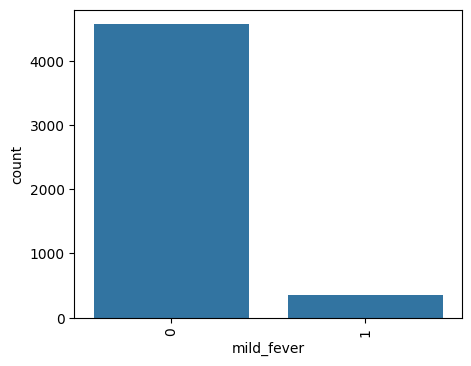

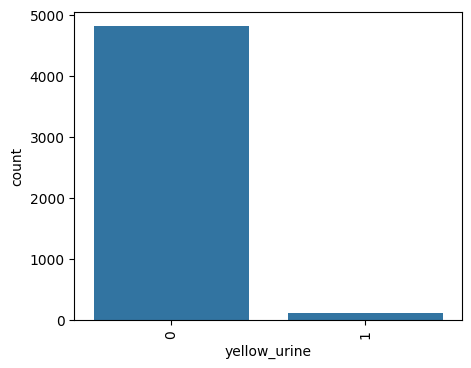

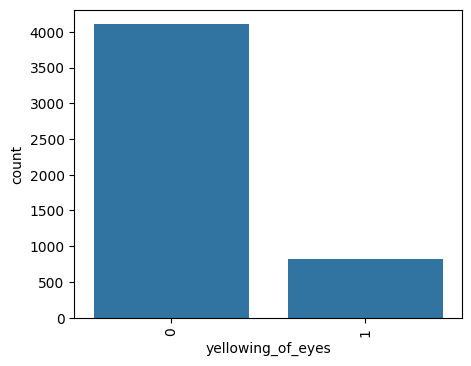

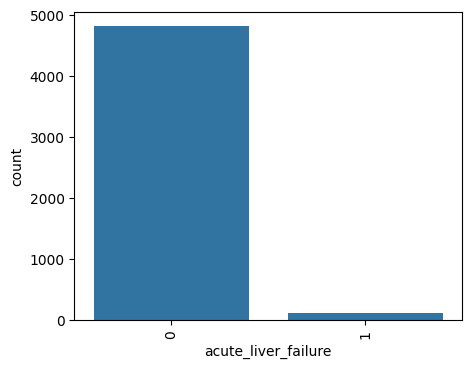

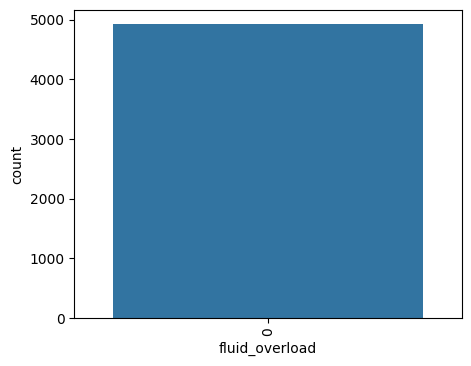

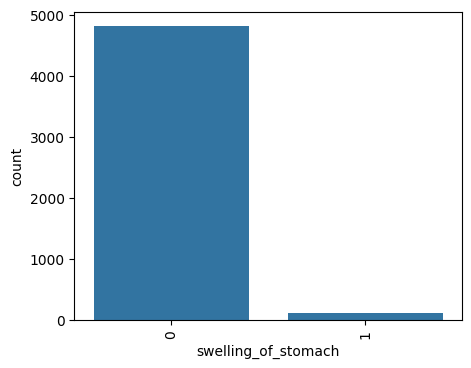

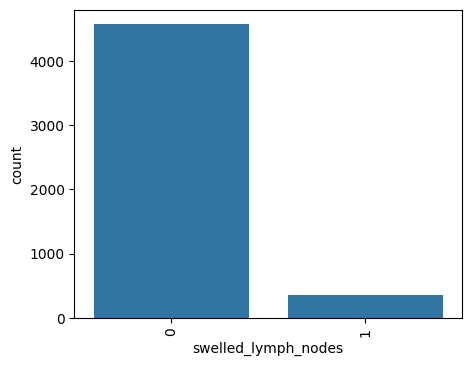

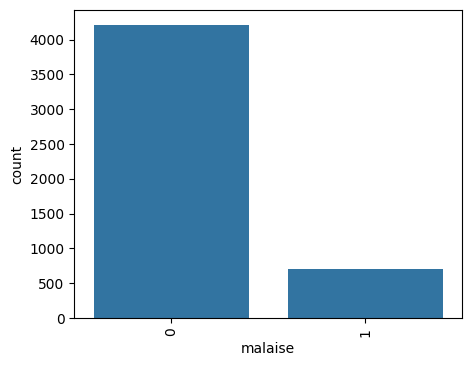

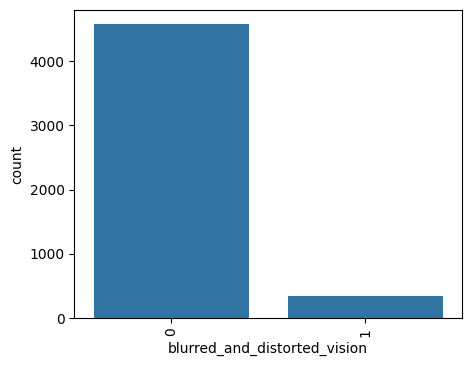

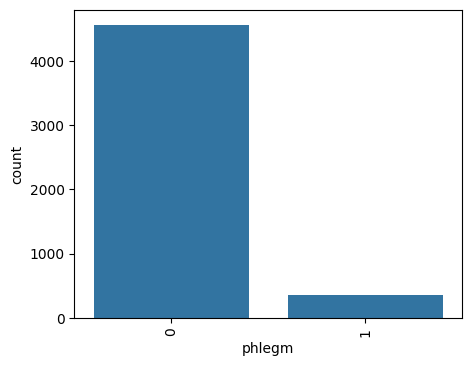

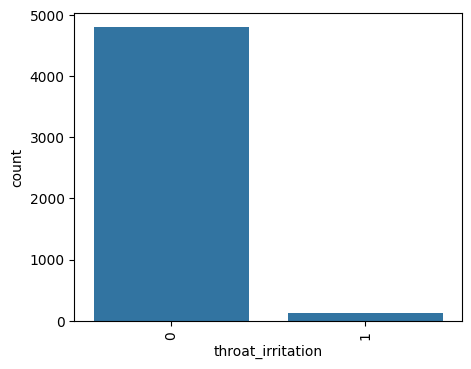

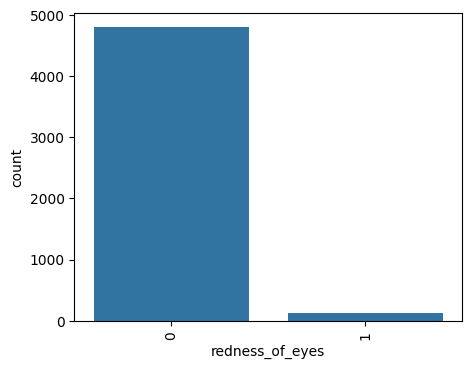

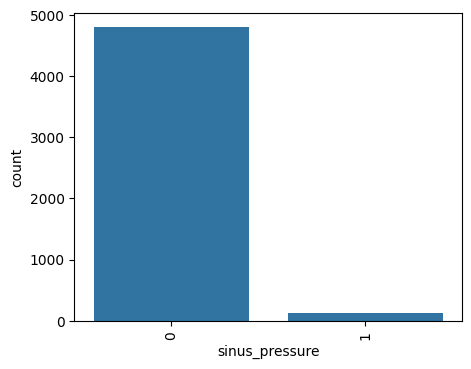

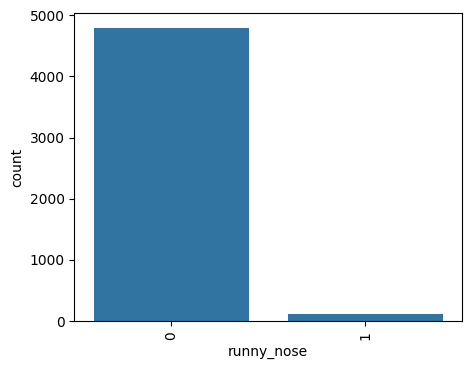

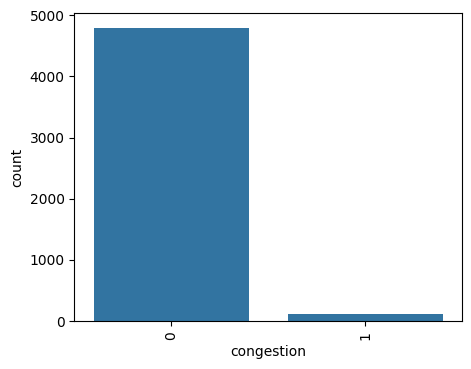

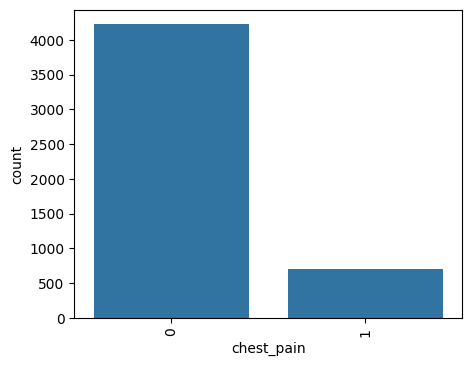

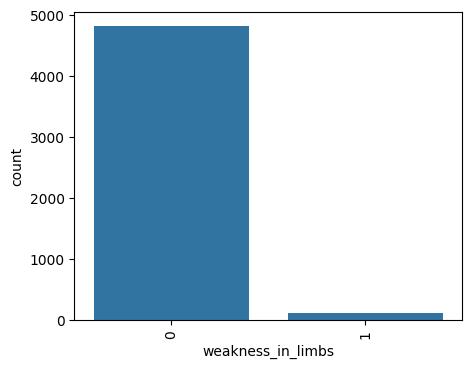

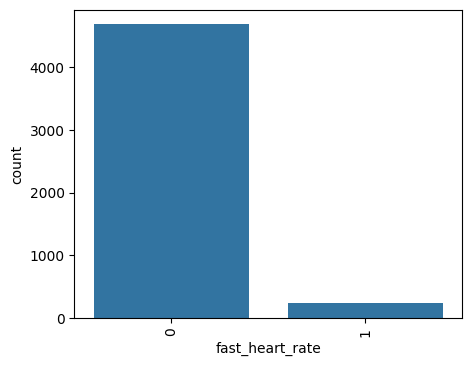

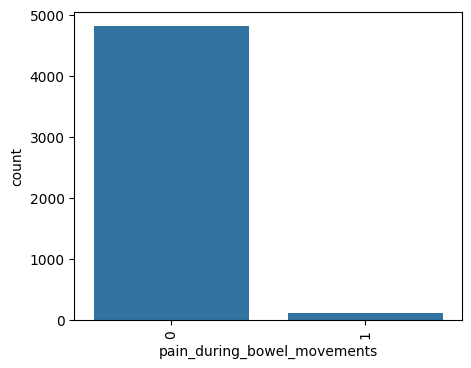

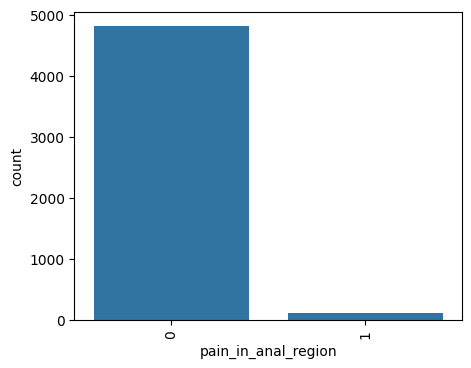

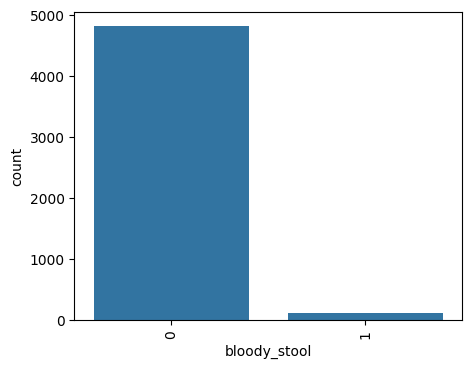

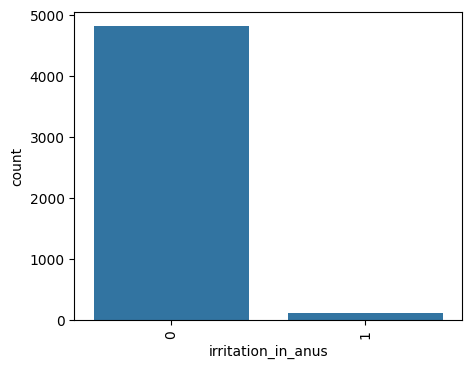

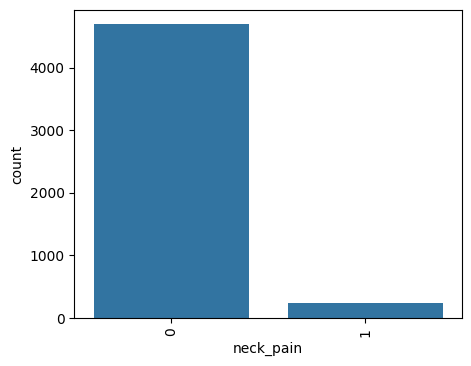

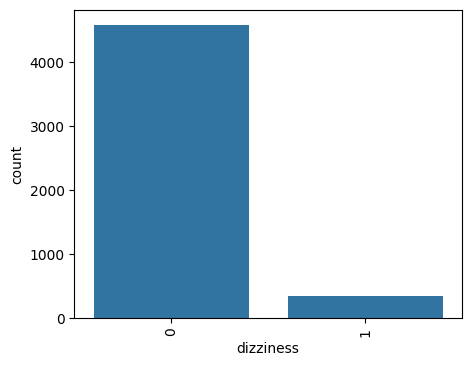

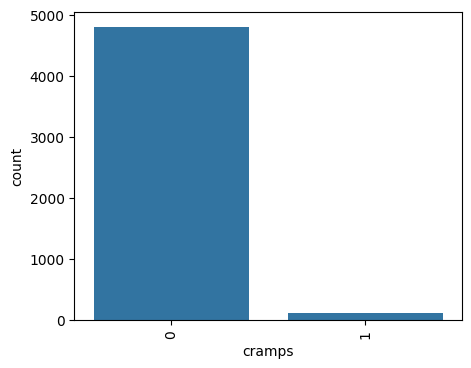

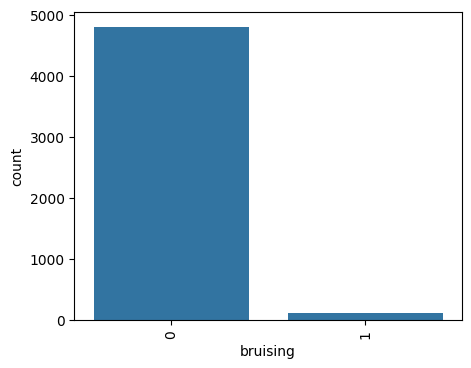

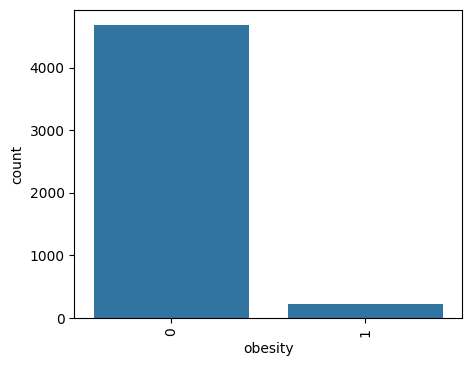

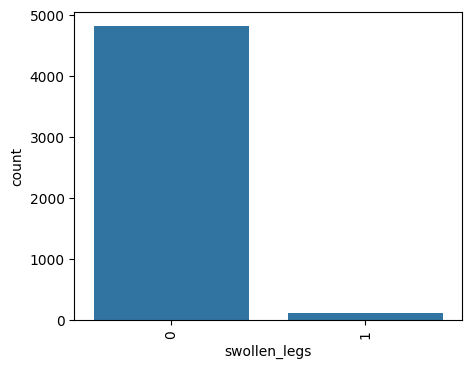

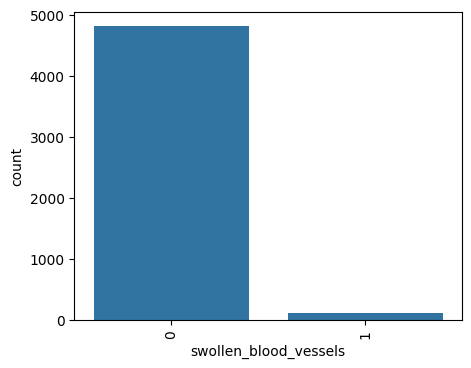

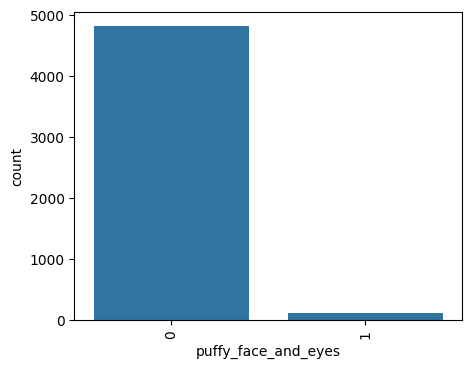

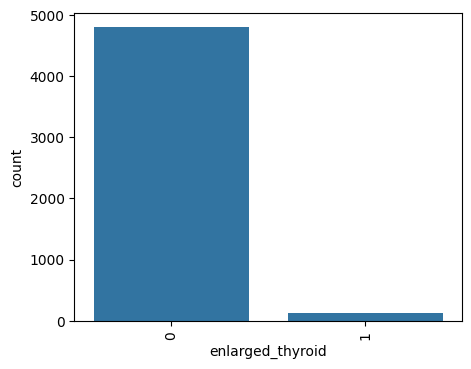

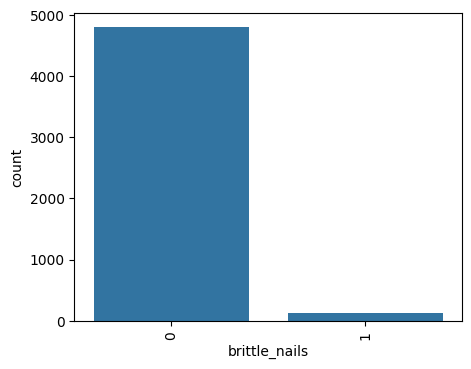

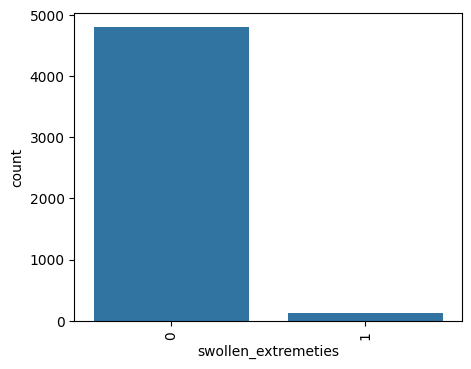

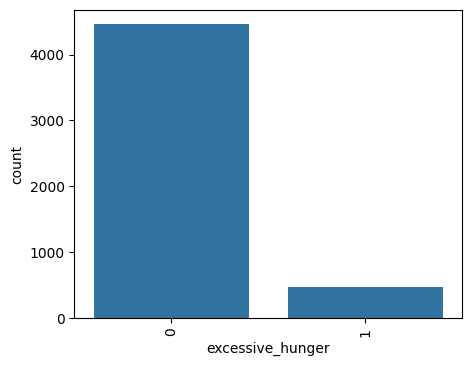

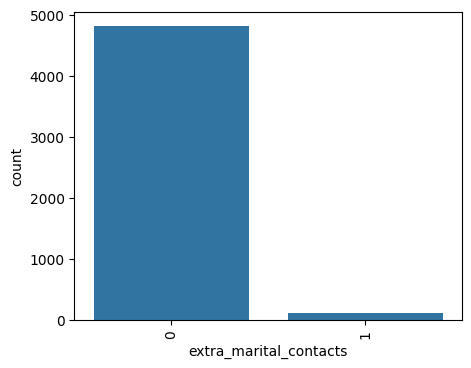

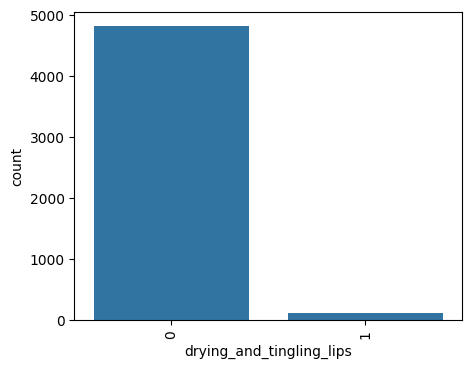

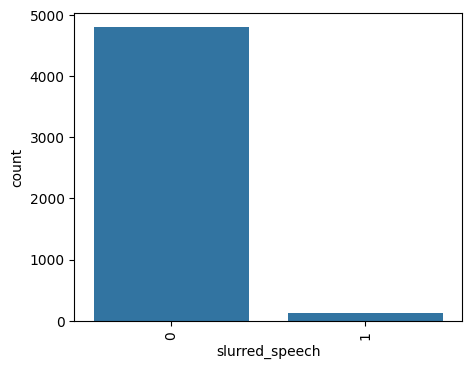

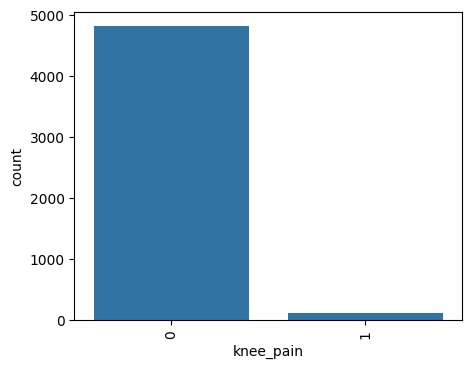

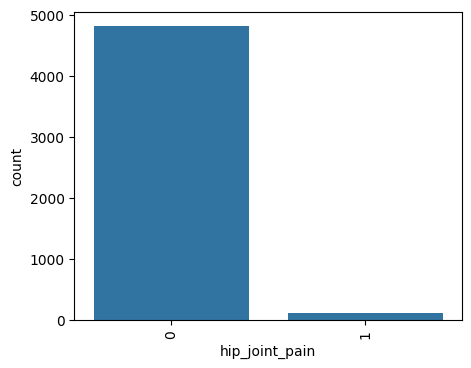

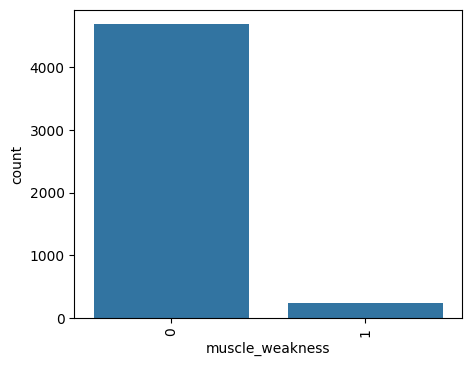

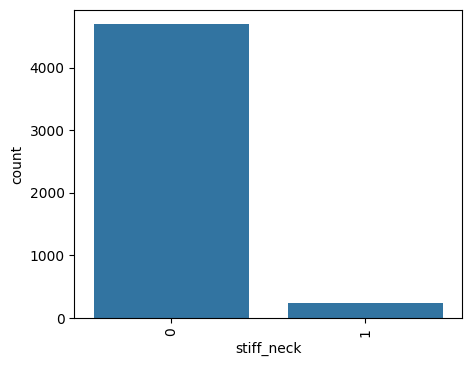

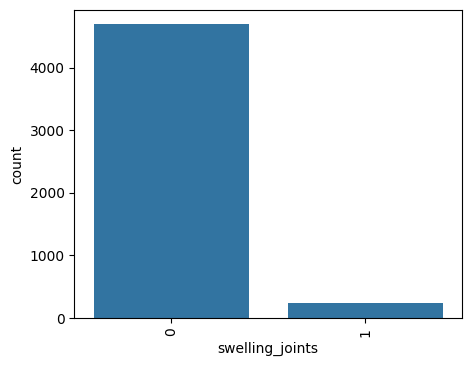

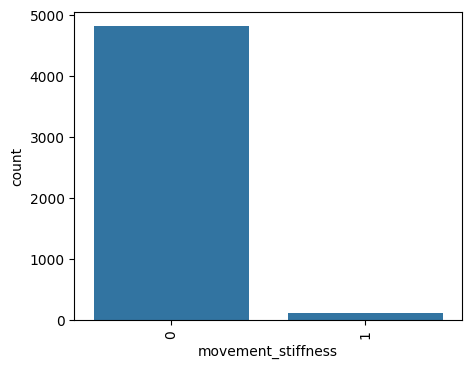

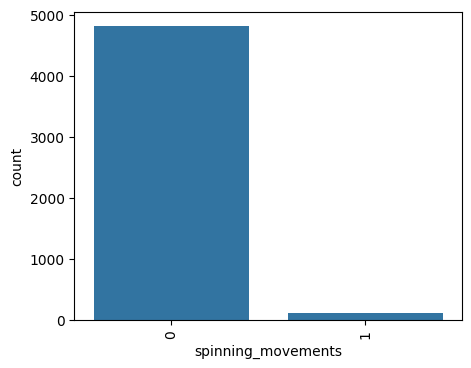

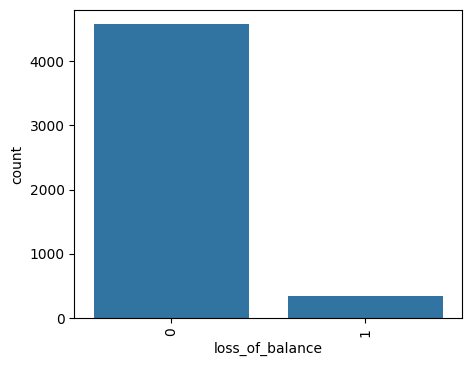

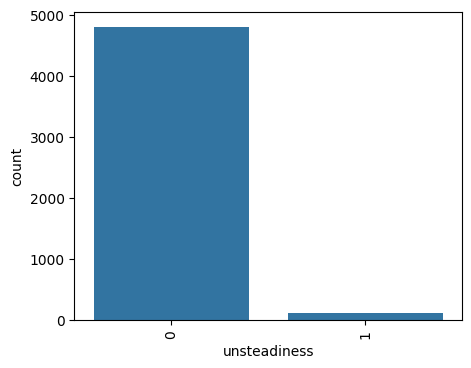

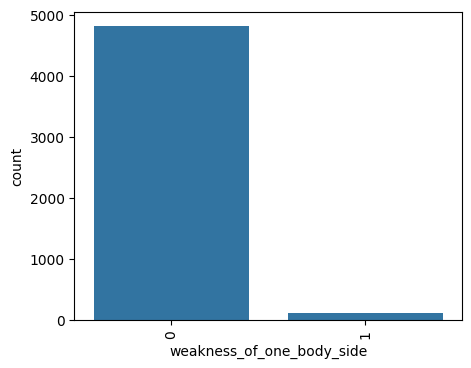

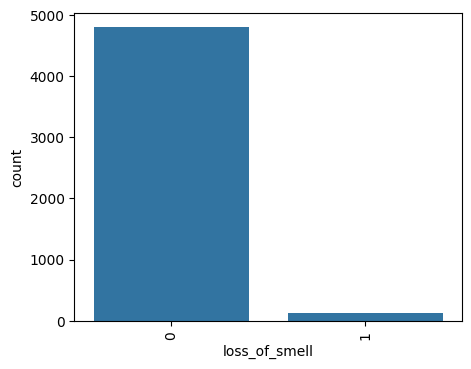

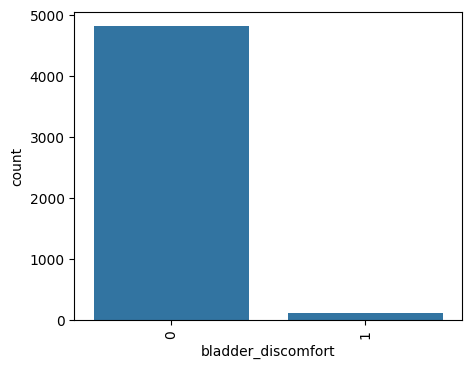

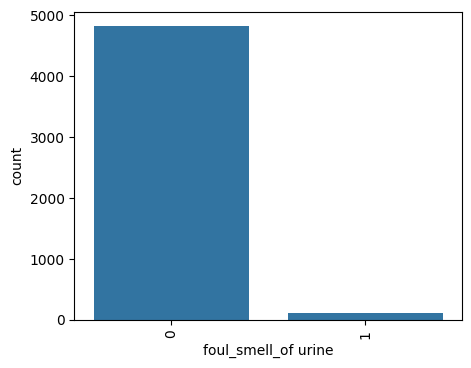

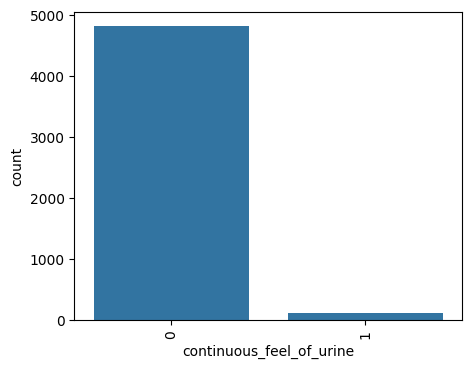

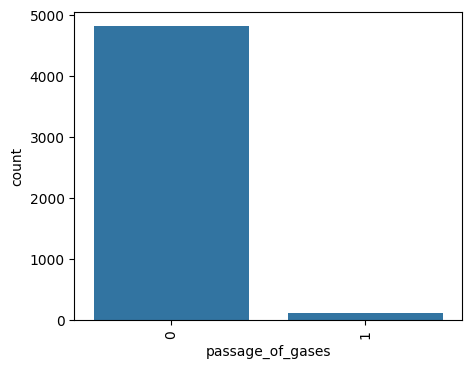

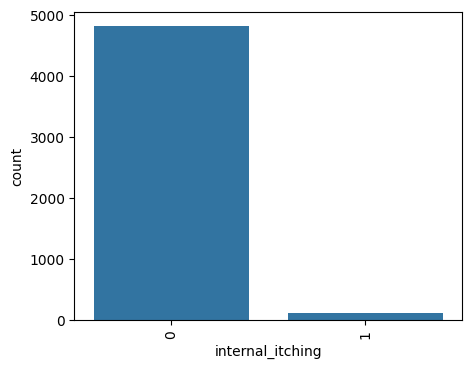

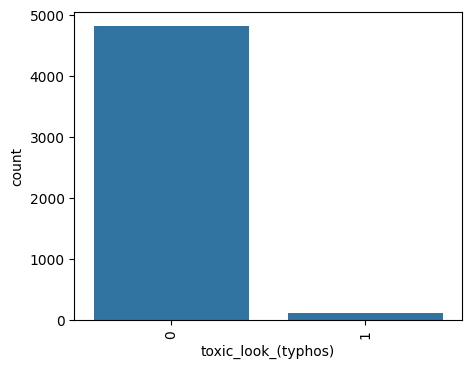

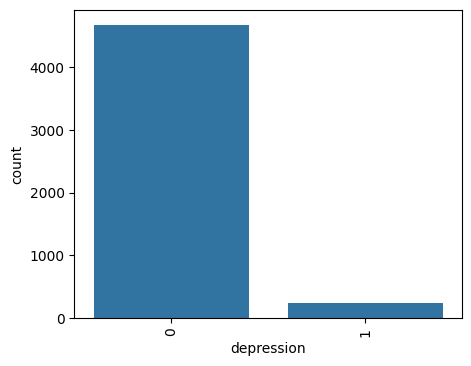

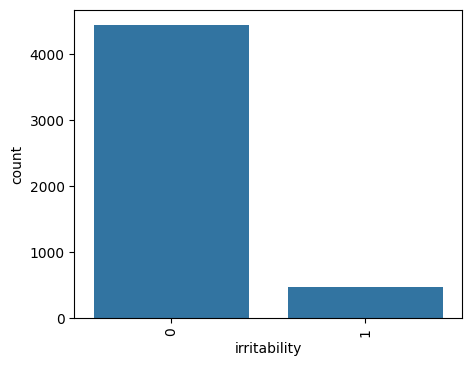

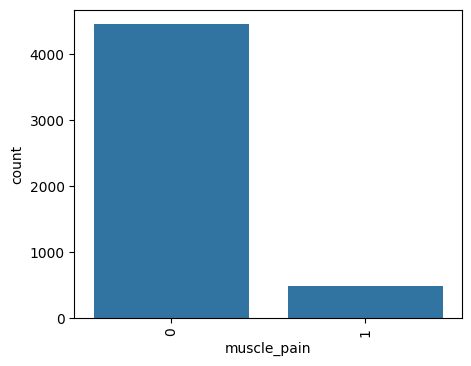

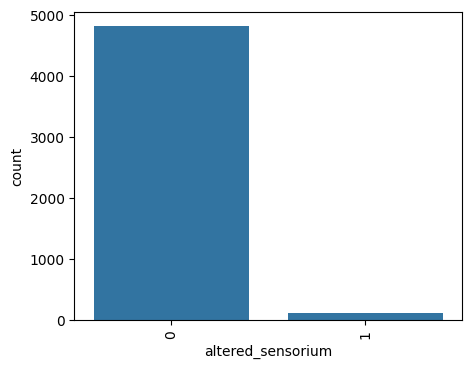

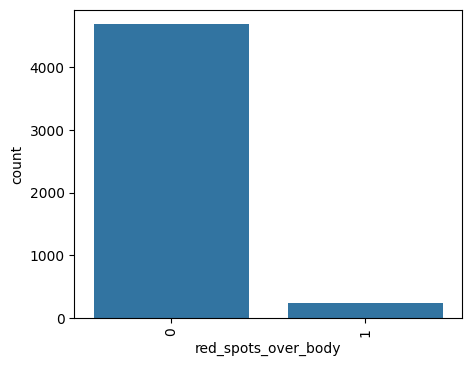

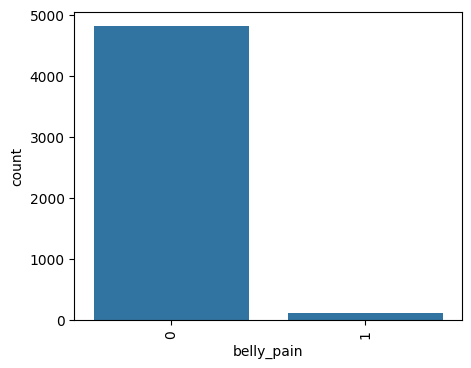

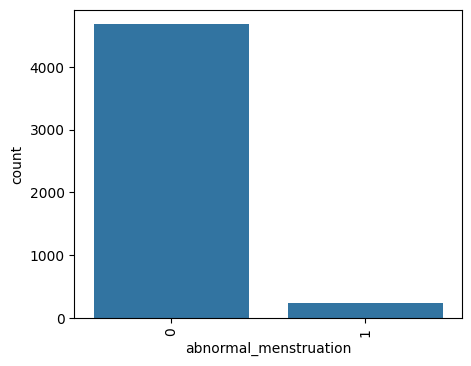

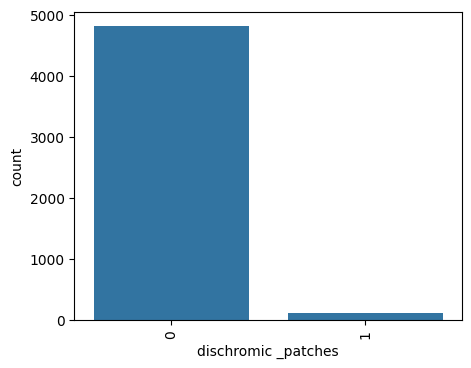

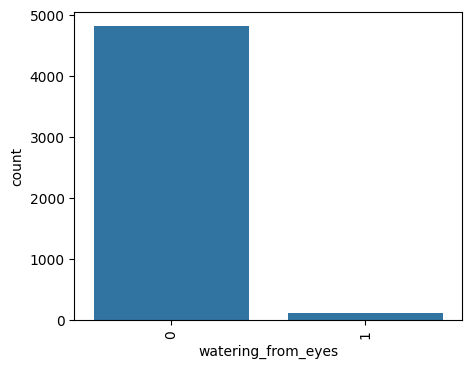

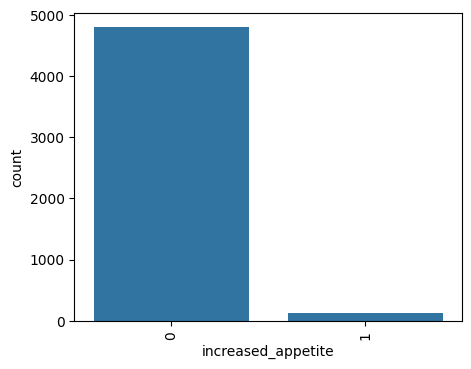

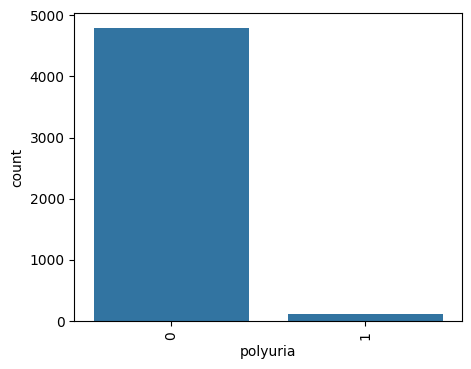

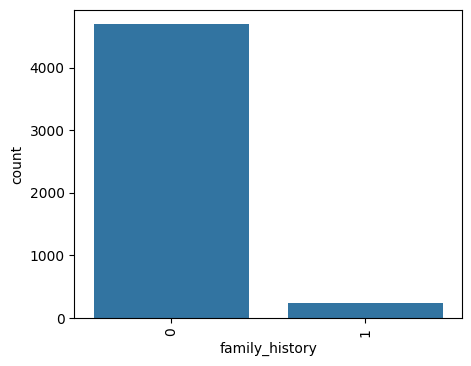

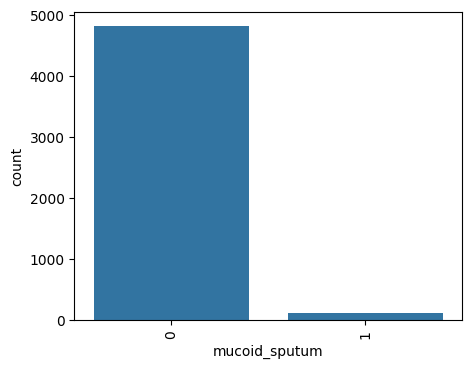

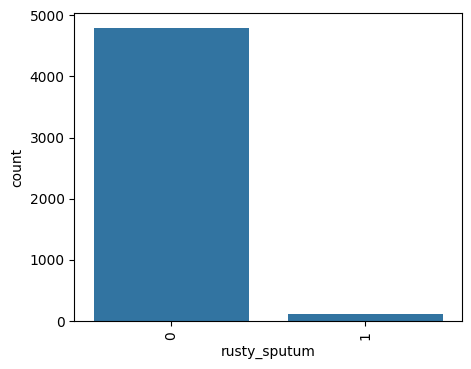

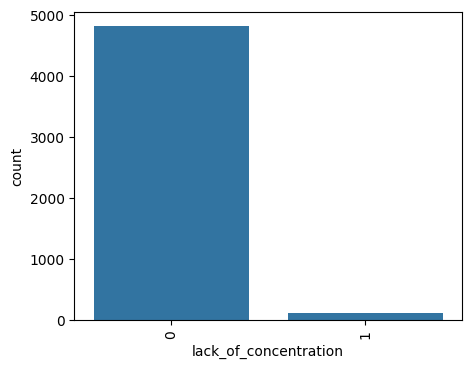

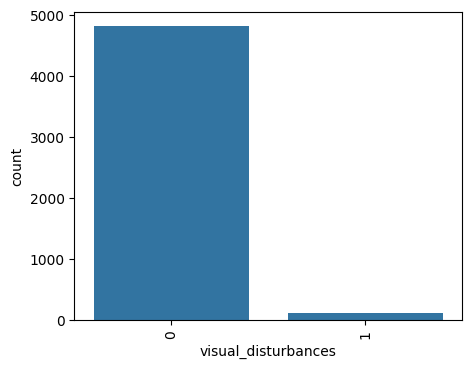

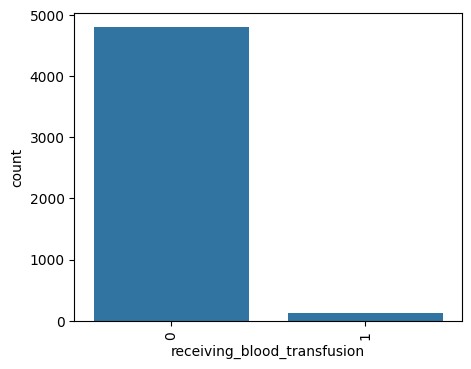

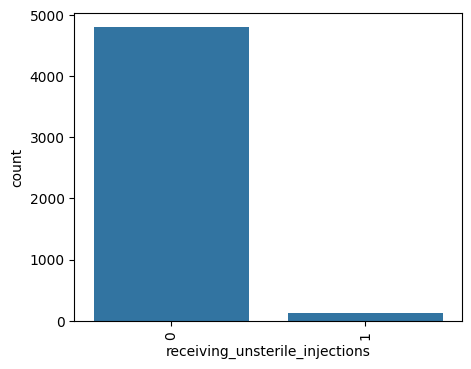

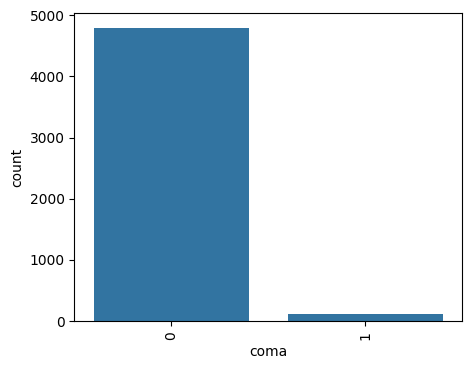

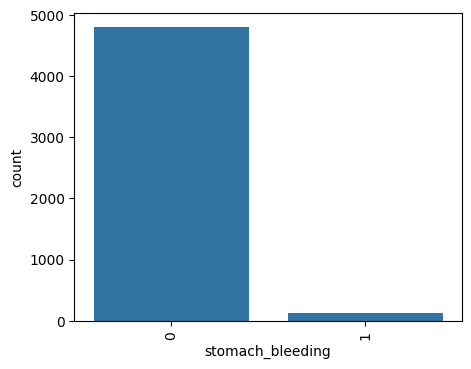

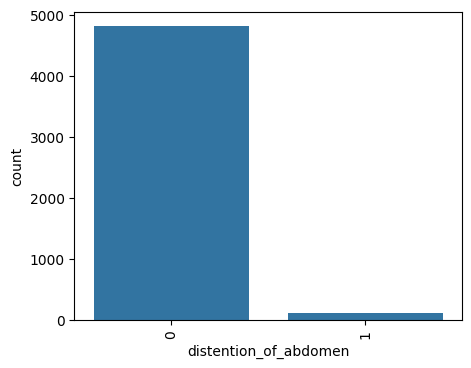

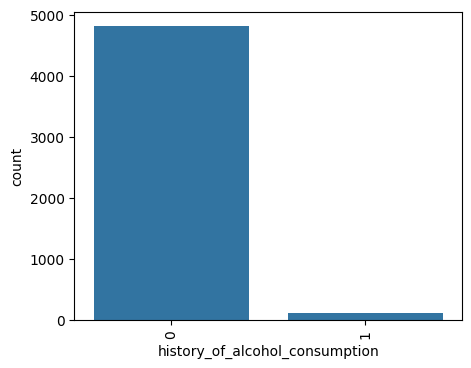

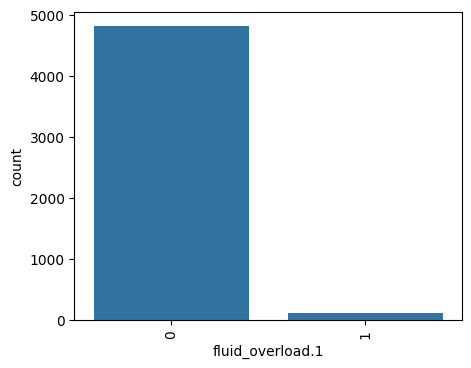

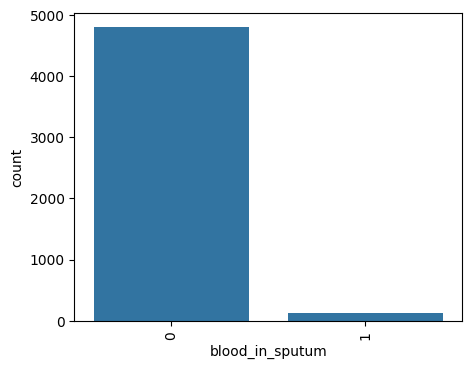

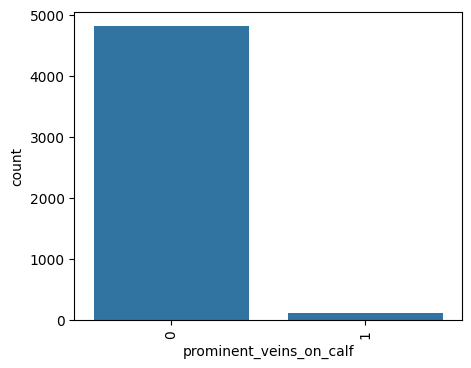

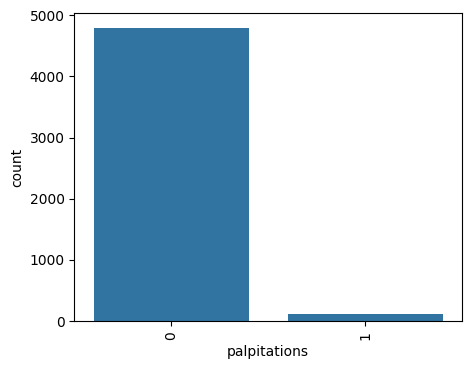

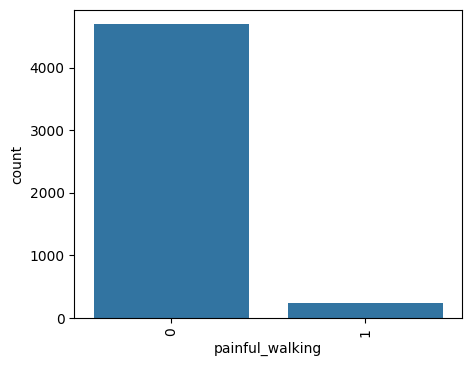

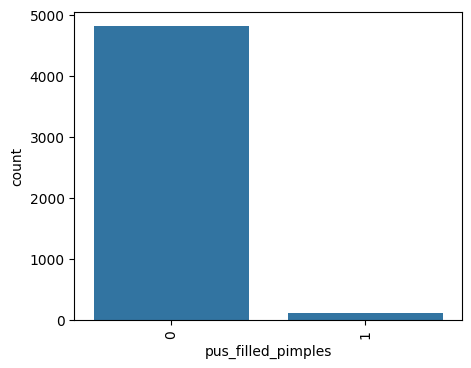

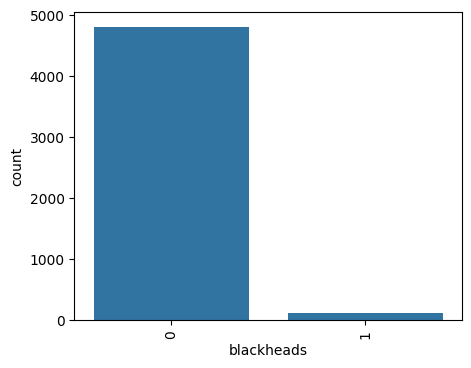

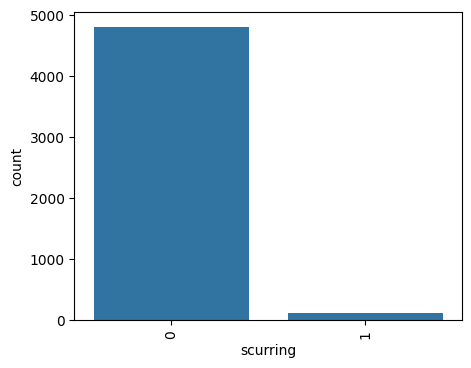

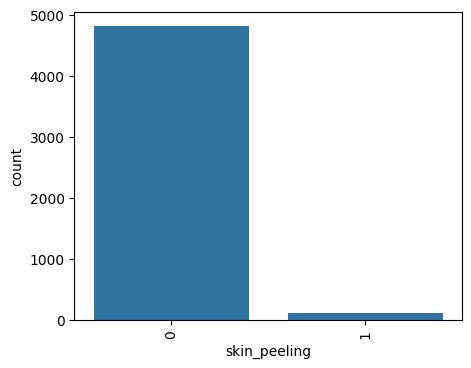

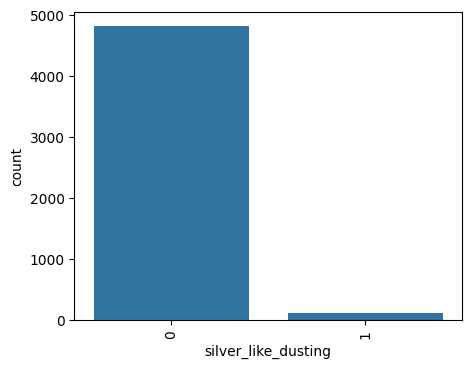

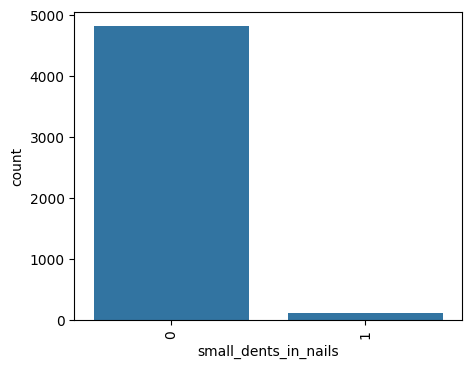

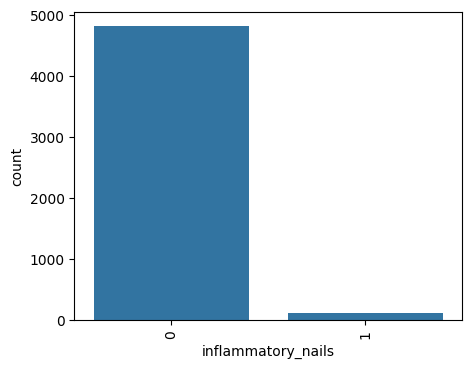

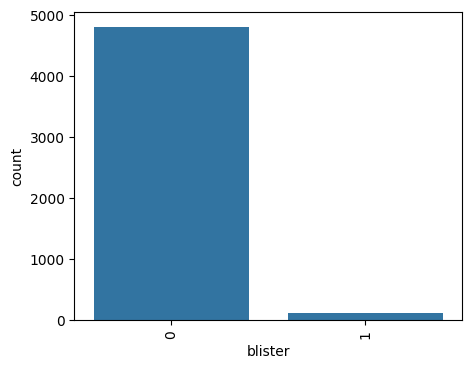

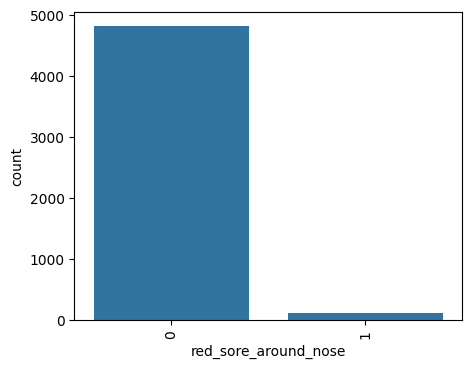

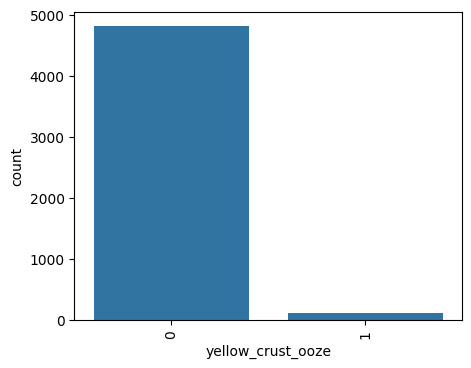

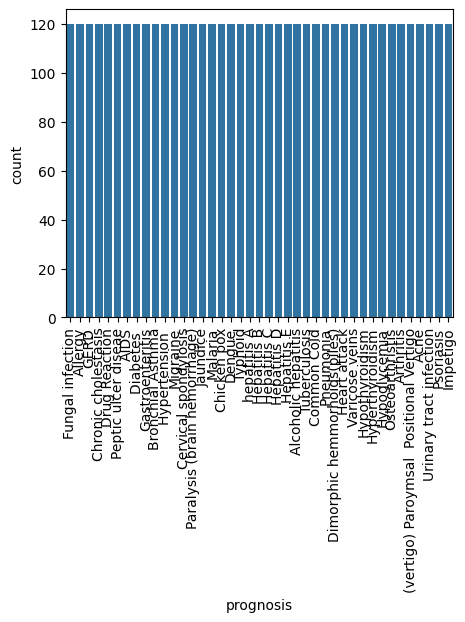

In [ ]:
for column in df_train.columns:
    fig=plt.figure(figsize=(5,4))
    sns.countplot(data=df_train,x=column)
    plt.xticks(rotation=90)
    plt.xlabel(column)
    plt.show()

<Axes: xlabel='itching', ylabel='Count'>

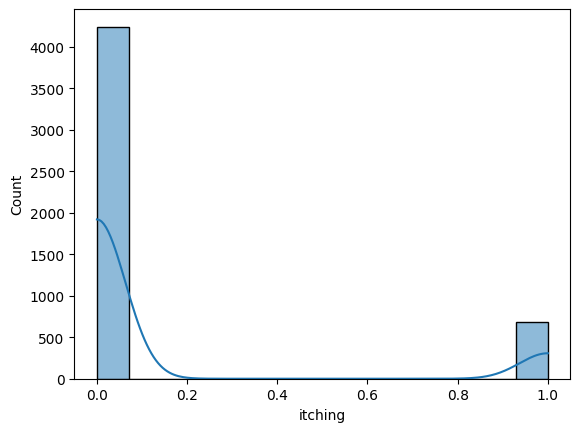

In [ ]:
sns.histplot(x='itching',data = df_train,kde=True)

<Axes: xlabel='skin_rash', ylabel='itching'>

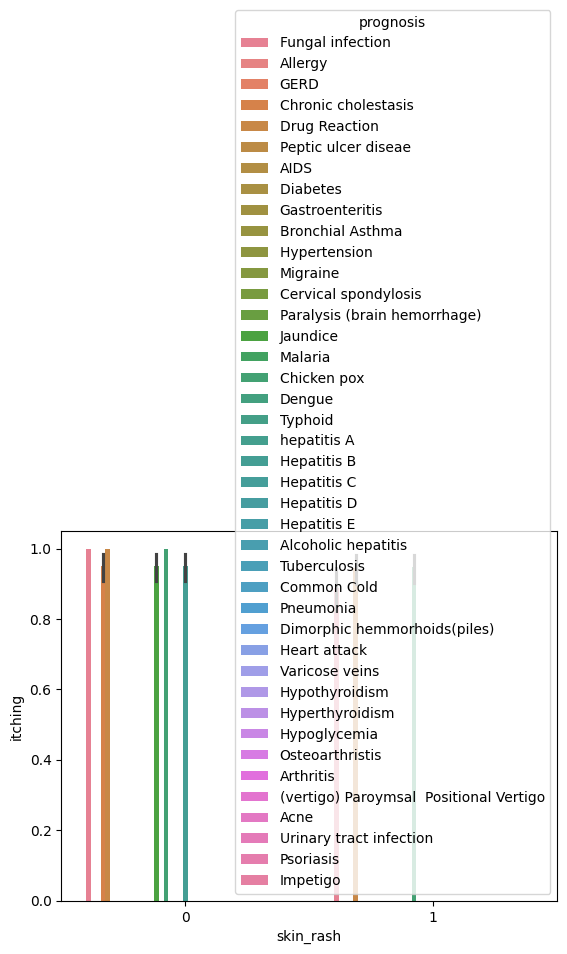

In [ ]:
sns.barplot(x=df_train["skin_rash"] , y=df_train["itching"] , data=df_train,hue="prognosis")

# Exploratory Data Analysis (EDA)

In [ ]:
class_counts = df_train['prognosis'].value_counts()
class_counts

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

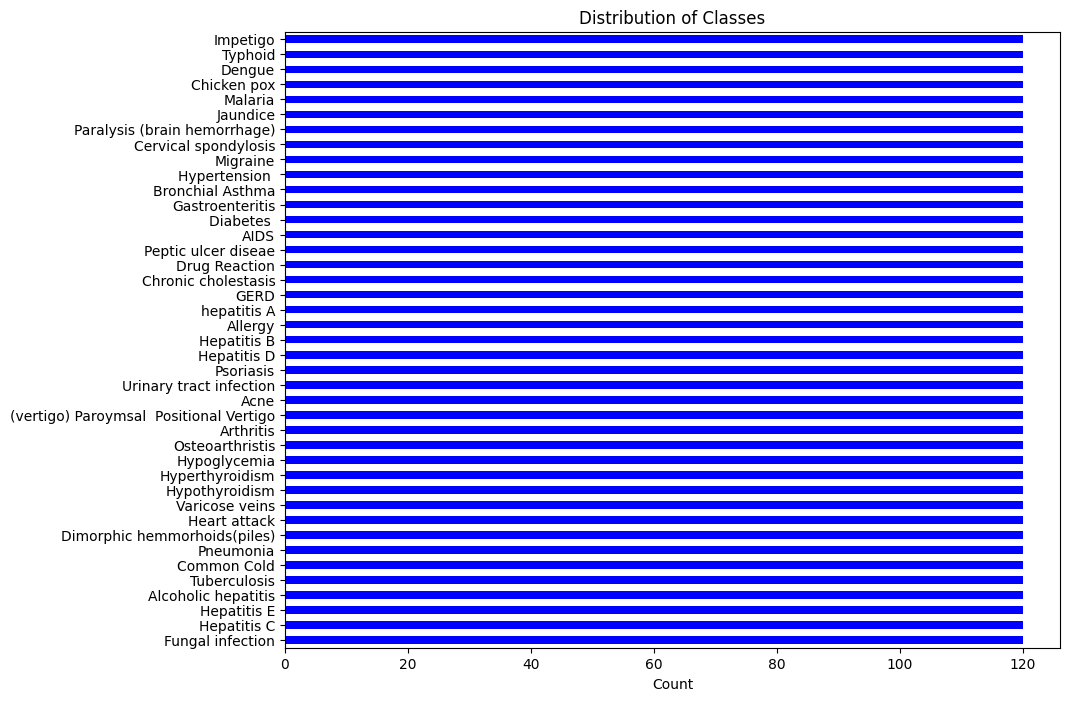

In [ ]:
# Plot the class count
class_count = df_train['prognosis']

plt.figure(figsize = (10,8))
class_counts.plot(kind = 'barh',color = 'blue')
plt.xlabel('Count')
plt.title('Distribution of Classes')
plt.show()

<Axes: xlabel='small_dents_in_nails', ylabel='inflammatory_nails'>

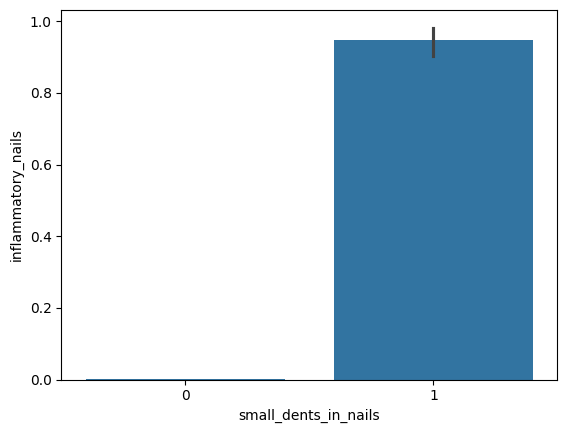

In [ ]:
sns.barplot(x=df_train["small_dents_in_nails"] , y=df_train["inflammatory_nails"] , data=df_train)

<Axes: xlabel='red_sore_around_nose', ylabel='continuous_sneezing'>

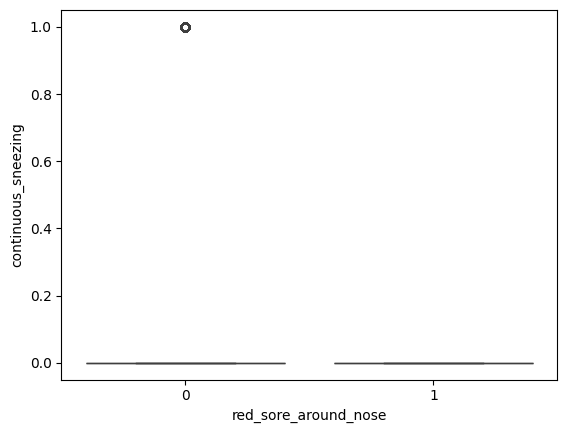

In [ ]:
sns.boxplot(x=df_train["red_sore_around_nose"] , y=df_train["continuous_sneezing"] , data=df_train)

In [ ]:
df_train.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [ ]:
y=encoder.fit_transform(y)

In [ ]:
Y =encoder.fit_transform(Y)

In [ ]:
y

array([15, 15, 15, ..., 38, 35, 27])

In [ ]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [ ]:
# Encode the prognosis to number(this is earier for the model)
encoder = LabelEncoder()
df_train['diagnosis'] = encoder.fit_transform(df_train['prognosis'])

In [ ]:
df_train['diagnosis'].unique()

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27])

In [ ]:
y = df_train['diagnosis']
x = df_train.drop(['prognosis','diagnosis'],axis=1)

In [ ]:
classification_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators= 7),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [ ]:
def train_model_and_evaluate(x,y,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)

    # initalize an empty set to store result
    result_list = []

    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)

        # Predicit the training and valiadtion set
        y_train_pred = model.predict(x_train)
        y_valid_pred = model.predict(x_valid)


        # Check each predictions accuracy
        train_accuracy = accuracy_score(y_train,y_train_pred)
        vald_accuracy = accuracy_score(y_valid,y_valid_pred)

        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Training Accuracy': train_accuracy,
            'Validation Accuracy': vald_accuracy
        })

    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)

    return result_df

In [ ]:
%%time
result_df = train_model_and_evaluate(x,y,classification_models)

CPU times: user 48.7 s, sys: 766 ms, total: 49.5 s
Wall time: 51.7 s


In [ ]:
result_df

,Model,Training Accuracy,Validation Accuracy
0,Logistic Regression,1.0,1.0
1,Decision Tree,1.0,1.0
2,Random Forest,1.0,1.0
3,Gradient Boosting,1.0,1.0
4,SVM,1.0,1.0
5,K-Nearest Neighbors,1.0,1.0


# TESTING

In [ ]:
# Encode the prognosis to number(this is earier for the model)
encoder = LabelEncoder()
df_test['diagnosis'] = encoder.fit_transform(df_test['prognosis'])

In [ ]:
y2 = df_test['diagnosis']
x2 = df_test.drop(['diagnosis','prognosis'],axis = 1)

In [ ]:
def test_model_and_evaluate(x,y,x1,y1,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)

    # initalize an empty set to store result
    result_list = []

    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)

        # Predicit the testing set
        y_test_pred = model.predict(x1)


        # Check each predictions accuracy
        test_accuracy = accuracy_score(y1,y_test_pred)

        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Test Accuracy': test_accuracy
        })

    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)

    return result_df

In [ ]:
%%time
result_df2 = test_model_and_evaluate(x,y,x2,y2,classification_models)

CPU times: user 46.9 s, sys: 768 ms, total: 47.6 s
Wall time: 49.1 s


In [ ]:
result_df2

,Model,Test Accuracy
0,Logistic Regression,1.00000
1,Decision Tree,0.97619
2,Random Forest,0.97619
3,Gradient Boosting,0.97619
4,SVM,1.00000
5,K-Nearest Neighbors,1.00000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf=RandomForestClassifier(n_estimators=300 , random_state=42,max_depth=25)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=25, n_estimators=300, random_state=42)

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
y_pred

array([ 2,  2, 24,  1,  9, 23, 25,  5, 19, 30, 38, 12, 21, 35,  3,  3, 13,
       22, 12,  7,  6, 40, 19,  6,  4, 20, 34, 30, 26, 30,  9, 19, 17, 22,
       39, 30, 28, 14, 34, 38, 20,  0, 23, 12, 28, 17, 25, 19, 35, 35, 18,
       36, 39,  4, 24, 20, 37, 10, 38, 33, 25, 24, 36, 18,  0, 26, 32,  1,
        0, 13, 15,  6,  2, 22, 26,  9, 27, 27, 10, 30, 16, 27, 16, 14, 19,
        1, 28, 17,  0, 11, 26, 29, 21,  3, 36, 17, 29, 18, 34, 11, 23,  6,
        3,  4, 33, 39, 16, 30, 22,  1, 21, 39, 18, 25, 12, 14, 26, 28, 25,
        3,  7, 35, 32,  8,  5, 34, 17, 24, 35, 31, 11,  7,  7,  7,  9,  2,
       19, 34, 13, 37, 33, 18, 35, 19, 21, 31, 14, 39, 36,  3, 12, 31, 33,
       37, 23, 37, 25, 21,  3,  4,  6, 28,  1, 18, 40, 37, 29,  6, 27, 24,
       40, 21, 40, 17, 34, 27,  1, 40, 10,  8, 29,  1,  4, 40, 30, 37, 12,
       19, 11, 38, 37,  2, 39, 34, 22,  8, 15,  7, 19, 31, 17, 40, 39, 11,
       15,  0, 16,  4,  9,  8, 19, 31, 18, 13, 17, 28, 29, 18,  9, 21, 11,
        3,  3, 23, 32, 40

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
#now cchecking the other dataset i.e test

In [ ]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [ ]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_prediction = rf.predict(X)

In [ ]:
test_prediction

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27,  8])

In [ ]:
print(accuracy_score(Y,test_prediction))

0.9761904761904762


In [ ]:
type(Y)

numpy.ndarray

In [ ]:
type(test_prediction)

numpy.ndarray

In [ ]:
Y

array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
       11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
       31,  5,  0,  2, 38, 35, 27, 15])

In [ ]:
# Convert NumPy arrays to DataFrames with column names
Y_df = pd.DataFrame(Y, columns=["prognosis"])
test_pred_df = pd.DataFrame(test_prediction, columns=["predicted"])

In [ ]:
result_df = Y_df.join(test_pred_df)

# Display the result DataFrame
print(result_df)

    prognosis  predicted
0          15         15
1           4          4
2          16         16
3           9          9
4          14         14
5          33         33
6           1          1
7          12         12
8          17         17
9           6          6
10         23         23
11         30         30
12          7          7
13         32         32
14         28         28
15         29         29
16          8          8
17         11         11
18         37         37
19         40         40
20         19         19
21         20         20
22         21         21
23         22         22
24          3          3
25         36         36
26         10         10
27         34         34
28         13         13
29         18         18
30         39         39
31         26         26
32         24         24
33         25         25
34         31         31
35          5          5
36          0          0
37          2          2
38         38         38


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred=dtree.predict(x_test)

In [ ]:
print(accuracy_score(y_test,dtree_pred))

1.0


In [ ]:
dtree_pred.shape

(984,)

In [ ]:
Y.shape

(42,)

In [ ]:
dtree_pred_test= dtree.predict(X)

In [ ]:
print(accuracy_score(Y,dtree_pred_test))

0.9761904761904762


**# Scale the features since SVM is sensitive to feature scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)
scaled_x = scaler.transform(X)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC(kernel ='linear', random_state = 52,C= 100)
svm_clf = svm_clf.fit(scaled_x_train,y_train)

In [ ]:
svm_clf

SVC(C=100, kernel='linear', random_state=52)

In [ ]:
pred_y=svm_clf.predict(scaled_x_test)

In [ ]:
print(accuracy_score(y_test,pred_y))

1.0


In [ ]:
pred_x_test = svm_clf.predict(scaled_x)

In [ ]:
print(accuracy_score(Y,pred_x_test))

0.9761904761904762


In [ ]:
 #Define hyperparameters for each model
models =[
    {'name':'RandomForest','model':RandomForestClassifier(),'params':{'n_estimators':[10,50,100],'max_depth':[5,10,None]}},
    {'name':'DecisionTree','model':DecisionTreeClassifier(),'params':{'max_depth':[5,10,None], 'min_sample_split':[2,5]}},
    {'name':'svm','model':SVC(),'params':{'kernel':['linear','rbf']}}
]

We can merge all model and get the accuracy through below method

In [ ]:
def test_model_and_evaluate(x,y,x1,y1,models):
    # Perform a split on the data for train and validation
    x_train,x_valid,y_train,y_valid = train_test_split(x,y,
                                                       test_size = 0.3,random_state = 45)

    # initalize an empty set to store result
    result_list = []

    for model_name,model in models.items():
        # Fit the model
        model.fit(x_train,y_train)

        # Predicit the testing set
        y_test_pred = model.predict(x1)


        # Check each predictions accuracy
        test_accuracy = accuracy_score(y1,y_test_pred)

        # Save the result in the list
        result_list.append({
            'Model': model_name,
            'Test Accuracy': test_accuracy
        })

    # Create a Dataframe for the list of result
    result_df = pd.DataFrame(result_list)

    return result_df

In [ ]:
%%time
result_df2 = test_model_and_evaluate(x,y,x2,y2,classification_models)

CPU times: user 48.3 s, sys: 499 ms, total: 48.8 s
Wall time: 55.6 s


In [ ]:
result_df2

,Model,Test Accuracy
0,Logistic Regression,1.00000
1,Decision Tree,0.97619
2,Random Forest,0.97619
3,Gradient Boosting,0.97619
4,SVM,1.00000
5,K-Nearest Neighbors,1.00000


,Model,Test Accuracy
0,Logistic Regression,1.00000
1,Decision Tree,0.97619
2,Random Forest,0.97619
3,Gradient Boosting,0.97619
4,SVM,1.00000
5,K-Nearest Neighbors,1.00000


**conclusion**

there is 97% of accuracy in disease prediction.
**check my link:**
